# FFT for PDEs

## Heat equation
[https://www.youtube.com/watch?v=hDeARtZdq-U](youtube)

1-D heat equation: $u_t = \alpha^2 u_{xx}$

FFT into $\hat{u}(\kappa, t)$ where $\kappa$ is a spatial frequency.

Key info:  
$u_x \Rightarrow i\kappa \hat{u}$  
$u_{xx} \Rightarrow -\kappa^2 \hat{u}$

$u_t = \alpha^2 u_{xx}$ Fourier $\Rightarrow \hat{u}_t = -\alpha^2 \kappa^2 \hat{u}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.cm as cm

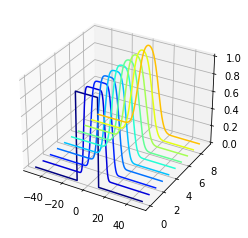

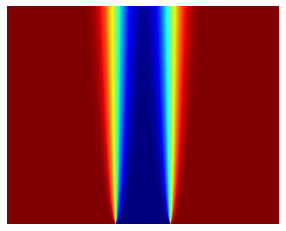

In [7]:
a = 1      # Thermal diffusivity
L = 100    # Length
N = 1000   # Number of discretization points

dx = L/N
x = np.arange(-L/2, L/2, dx)

# Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

u0 = np.zeros_like(x)
u0[int((L/2-L/10)/dx):int((L/2+L/10)/dx)] = 1
u0hat = np.fft.fft(u0)

u0hat_ri = np.concatenate((u0hat.real, u0hat.imag))

dt = 0.1
t = np.arange(0, 10, dt)

def rhsHeat(uhat_ri, t, kappa, a):
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -a**2 * (np.power(kappa, 2)) * uhat
    d_uhat_ri = np.concatenate((d_uhat.real, d_uhat.imag)).astype('float64')
    return d_uhat_ri

uhat_ri = odeint(rhsHeat, u0hat_ri, t, args=(kappa, a))

uhat =  uhat_ri[:,:N] + (1j) * uhat_ri[:,N:]

u = np.zeros_like(uhat)

for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])

u = u.real

# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.set_cmap('jet_r')
u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x, ys, u_plot[j,:], color=cm.jet(j*20))
plt.show()

# Image plot
plt.figure()
plt.imshow(np.flipud(u), cmap='jet_r', aspect=8)
plt.axis('off')
plt.show()